```16/04/2025 - Gabriel A. Amici```

# Plots para o relatório final

1. Transições de população
    * Nível fundamental --> primeiro excitado
    * Variação com alpha
2. Ionização X tempo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from numba import njit
from matplotlib.ticker import AutoMinorLocator


plt.style.use('Ltx.mplstyle')

Bad value in file 'Ltx.mplstyle', line 25 ("axes.prop_cycle: cycler(['#1d65c9', '#ff1a1a', '#ff6a00', '#ffd500', '#bfe500', '#7ee236'])"): Key axes.prop_cycle: "cycler(['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)


In [3]:
results_path = "./data/"
figures_path = "./figures/"

In [4]:
"""COLOURS"""
AmC_DEEP_BLUE = '#1d65c9'
AmC_BRIGHT_RED = '#ff1a1a'
AmC_VIVID_ORANGE = '#ff6a00'
AmC_BOLD_YELLOW = '#ffd500'
AmC_LIGHT_GREEN = '#bfe500'
AmC_LIME_GREEN = '#7ee236'

Perc7_DKBLUE_1 = '#340498'
Perc7_PURPUR_2 = '#6c00a8'
Perc7_VIOLET_3 = '#a31d99'
Perc7_PINKSH_4 = '#ca4678'
Perc7_AMBERS_5 = '#e97257'
Perc7_ORANGE_6 = '#fa9f3a'
Perc7_YELLOW_7 = '#f8db24'

Perc7 = [Perc7_DKBLUE_1, Perc7_PURPUR_2, Perc7_VIOLET_3, Perc7_PINKSH_4, Perc7_AMBERS_5, Perc7_ORANGE_6, Perc7_YELLOW_7]

Perc5_DKBLUE_1 = '#340498'
Perc5_PURPLE_2 = '#7e03a7'
Perc5_PINKSH_3 = '#b83289'
Perc5_ROSSEE_4 = '#de6063'
Perc5_ORANGE_5 = '#f8983d'

Perc5 = [Perc5_DKBLUE_1, Perc5_PURPLE_2, Perc5_PINKSH_3, Perc5_ROSSEE_4, Perc5_ORANGE_5]
Perc5_reverse = Perc5[::-1]


/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/src/emerald/potentials/msc_potential.py:25: RuntimeWarning: overflow encountered in multiply
  morse = D * (np.exp(-2 * beta * r) - 2 * np.exp(-beta * r))


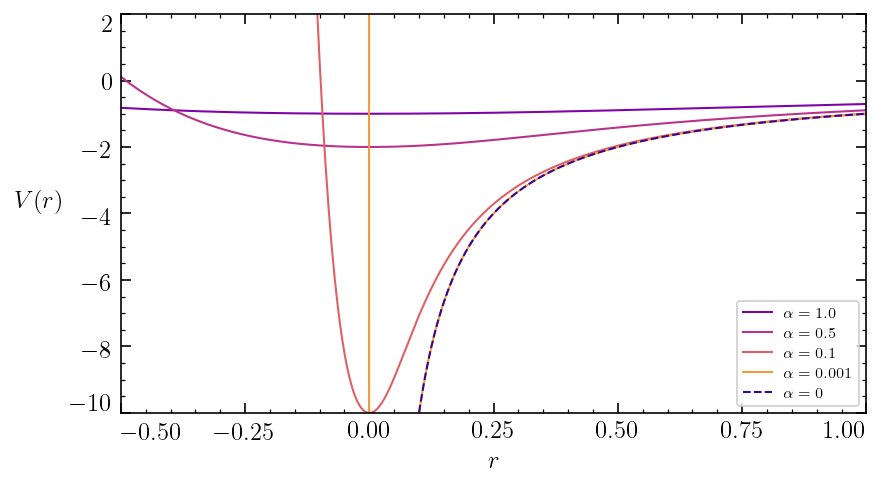

In [5]:
from emerald.potentials.msc_potential import MsC_potential_vec
from emerald.potentials.coulomb_potential import C_potential_vec

cols = [AmC_BRIGHT_RED, AmC_VIVID_ORANGE, AmC_BOLD_YELLOW, AmC_LIME_GREEN, AmC_DEEP_BLUE]
#ls_array = [(0, (5, 5)), (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)), (0, (1, 1))]

fig1 = plt.figure(dpi=148)
fig1.gca().set_xlim(-0.5, 1)
fig1.gca().set_ylim(-10, 2)
fig1.gca().set_xticks(np.arange(-0.5, 1.25, 0.25))
fig1.gca().set_yticks(np.arange(-10, 4, 2))

fig1.gca().xaxis.set_minor_locator(AutoMinorLocator())
fig1.gca().yaxis.set_minor_locator(AutoMinorLocator())

fig1.gca().tick_params(
    reset=True,
    which='both',
    direction='in',
    right = True,
    top = True
)
fig1.gca().tick_params(
    which='major',
    length=5
)


fig1.gca().set_ylabel(r"$V(r)$", rotation=0, labelpad=15)
fig1.gca().set_xlabel(r"$r$")

#fig1.gca().set_title("The Morse-soft-Coulomb potential")


rs = np.linspace(-0.5, 1, 500)


i=0
for alpha in [1.0, 0.5, 0.1, 0.001]:
    pots = MsC_potential_vec(alpha, rs)

    fig1.gca().plot(rs, pots, markersize=0, c=Perc5[i+1], ls="solid", label=r"$\alpha = {}$".format(alpha))
    #fig1.gca().legend(loc=4)
    #fig1.legend(ncol=5)
    i += 1


coulombs = C_potential_vec(np.linspace(0.001, 1, 500))
fig1.gca().plot(np.linspace(0.001, 1, 500), coulombs, markersize=0, c=Perc5_reverse[i], ls="dashed", label=r"$\alpha = 0$")
fig1.gca().legend(loc=4)


fig1.gca().get_xticklabels()[0].set_horizontalalignment("left")
fig1.gca().get_xticklabels()[-1].set_horizontalalignment("right")

fig1.gca().get_yticklabels()[0].set_verticalalignment("bottom")
fig1.gca().get_yticklabels()[-1].set_verticalalignment("top")

In [6]:
fig1.savefig(figures_path + "Fig1" + ".pdf", bbox_inches="tight")

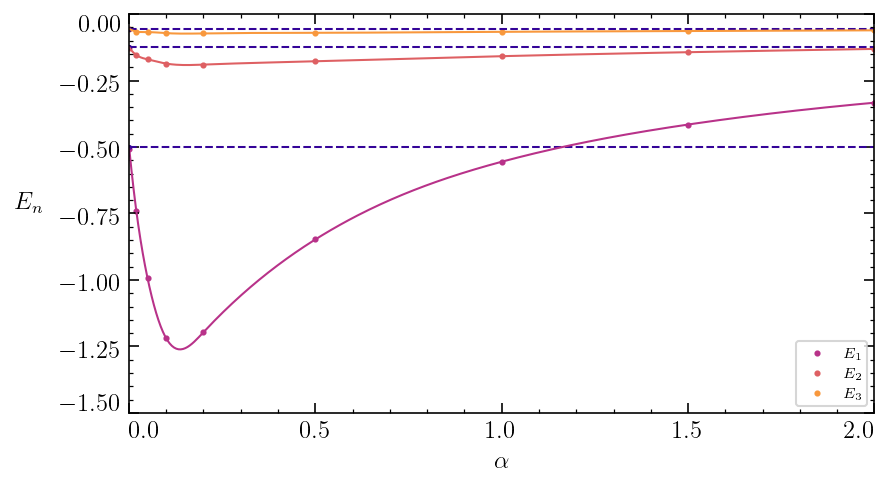

In [7]:
from scipy.interpolate import CubicSpline

alphas = [0.001, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0, 3.0]

E_fundamental = [-0.507222763325396, -0.7417284180827225, -0.9932954127665031, -1.2195521386647037, -1.1965197567467507, -0.8478264439718249, -0.5555106037446078, -0.4155949320443357, -0.3334087800325134, -0.24042040731145586]
fundamental_spline = CubicSpline(alphas, E_fundamental)

E_first = [-0.125897635085829, -0.154284131883997, -0.17042456955466578, -0.1862927744729643, -0.19012684886508913, -0.17787418595335616, -0.15858669377440712, -0.14351110579332726, -0.13118489347145748, -0.11207057820641428]
first_spline = CubicSpline(alphas, E_first)

E_second = [-0.05582102486895009, -0.06584191814507735, -0.06792027229150258, -0.0718393093976917, -0.0729083334462155, -0.07060294354271558, -0.06690802094586888, -0.06393040840771867, -0.0613162172704201, -0.05673491862605784]
second_spline = CubicSpline(alphas, E_second)

from emerald.potentials.coulomb_potential import C_energy_levels

fig1 = plt.figure(dpi=148)
fig1.gca().set_xlim(0, 2)
fig1.gca().set_ylim(-1.2, 0)
fig1.gca().set_xticks(np.arange(0, 2.5, 0.5))
fig1.gca().set_yticks(np.arange(-1.5, 0.25, 0.25))

fig1.gca().xaxis.set_minor_locator(AutoMinorLocator())
fig1.gca().yaxis.set_minor_locator(AutoMinorLocator())

fig1.gca().tick_params(
    reset=True,
    which='both',
    direction='in',
    right = True,
    top = True
)
fig1.gca().tick_params(
    which='major',
    length=5
)


fig1.gca().set_ylabel(r"$E_n$", rotation=0, labelpad=15)
fig1.gca().set_xlabel(r"$\alpha$")

#fig1.gca().set_title("The Morse-soft-Coulomb potential")

cols = Perc5

alpha_range = np.linspace(0.001, 3, 500)

fig1.gca().plot( [0, 3], C_energy_levels(1)*np.array([1, 1]), ls="dashed", c=cols[0] )
fig1.gca().plot( [0, 3], C_energy_levels(2)*np.array([1, 1]), ls="dashed", c=cols[0] )
fig1.gca().plot( [0, 3], C_energy_levels(3)*np.array([1, 1]), ls="dashed", c=cols[0] )

fig1.gca().scatter(alphas, E_fundamental, s=4, label=r"$E_1$", c=cols[2])
fig1.gca().scatter(alphas, E_first, s=4, label=r"$E_2$", c=cols[3])
fig1.gca().scatter(alphas, E_second, s=4, label=r"$E_3$", c=cols[4])

fig1.gca().plot(alpha_range, fundamental_spline(alpha_range), markersize=0, c=cols[2])
fig1.gca().plot(alpha_range, first_spline(alpha_range), markersize=0, c=cols[3])
fig1.gca().plot(alpha_range, second_spline(alpha_range), markersize=0, c=cols[4])
fig1.gca().legend(loc=4)
#fig1.gca().set_xscale('log')


fig1.gca().get_xticklabels()[0].set_horizontalalignment("left")
fig1.gca().get_xticklabels()[-1].set_horizontalalignment("right")

fig1.gca().get_yticklabels()[0].set_verticalalignment("bottom")
fig1.gca().get_yticklabels()[-1].set_verticalalignment("top")

In [8]:
fig1.savefig(figures_path + "Fig2" + ".pdf", bbox_inches="tight")

In [56]:
print(fundamental_spline(1.1633))
print(first_spline(1.1633))
print(second_spline(1.1633))

-0.5000068208279673
-0.15309603841052008
-0.06575395995842907


0.02
0.02
0.02
0.02


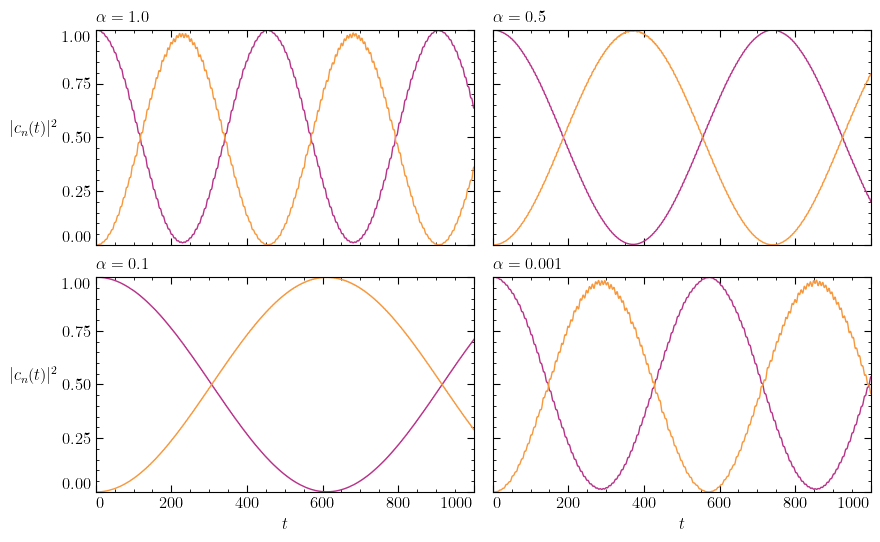

In [9]:
cols = [Perc5_PINKSH_3, Perc5_ORANGE_5]
fig2, axs2 = plt.subplots(2, 2, sharex=True, sharey=True)
fig2.set_figwidth(10)
fig2.set_figheight(6)
plt.subplots_adjust(hspace=0.15, wspace=0.05)
axs2[0][0].set_xlim(0, 1000)
axs2[0][0].set_ylim(0, 1)
axs2[0][0].set_yticks(np.arange(0, 1.25, 0.25))
axs2[0][0].set_ylabel(r"$|c_n(t)|^2$", rotation=0, labelpad=20)
axs2[1][0].set_ylabel(r"$|c_n(t)|^2$", rotation=0, labelpad=20)
axs2[1][0].set_xlabel(r"$t$")
axs2[1][1].set_xlabel(r"$t$")


folder_path= results_path + "transition/"
all_items = os.listdir(folder_path)

# Filter out only files
files = sorted([os.path.join(folder_path, f) for f in all_items if os.path.isfile(os.path.join(folder_path, f))])

i = 0
for filename in files:
    with open(filename, "r") as filehandle:
        data = json.load(filehandle)
        filehandle.close()

    alpha = data["parameters"]["alpha"]
    time_grid = np.array(data["results"]["sliced_time_array"])
    coefficients_history = np.array(data["results"]["coefficients_history"])

    print(data["parameters"]["field_amplitude"])
    axs2[int(i/2)][i%2].set_title(r"$\alpha={}$".format(alpha), loc='left', fontweight='bold')
    axs2[int(i/2)][i%2].plot(time_grid, coefficients_history[0, :], markersize=0, c=cols[0], ls="solid", label=r"$n = 1$")
    axs2[int(i/2)][i%2].plot(time_grid, coefficients_history[1, :], markersize=0, c=cols[1], ls="solid", label=r"$n = 2$")

    axs2[int(i/2)][i%2].xaxis.set_minor_locator(AutoMinorLocator())
    axs2[int(i/2)][i%2].yaxis.set_minor_locator(AutoMinorLocator())

    axs2[int(i/2)][i%2].tick_params(
        reset=True,
        which='both',
        direction='in',
        right = True,
        top = True
    )
    axs2[int(i/2)][i%2].tick_params(
        which='major',
        length=5
    )
    i += 1


# Hide Y-axis labels for second column
axs2[0][1].tick_params(labelleft=False)
axs2[1][1].tick_params(labelleft=False)
# Hide X-axis labels for first row
axs2[0][0].tick_params(labelbottom=False)
axs2[0][1].tick_params(labelbottom=False)

axs2[0][0].get_yticklabels()[0].set_verticalalignment("bottom")
axs2[0][0].get_yticklabels()[-1].set_verticalalignment("top")

axs2[1][0].get_yticklabels()[0].set_verticalalignment("bottom")
axs2[1][0].get_yticklabels()[-1].set_verticalalignment("top")

axs2[1][1].get_xticklabels()[0].set_horizontalalignment("left")
axs2[1][1].get_xticklabels()[-1].set_horizontalalignment("right")

axs2[1][0].get_xticklabels()[0].set_horizontalalignment("left")
axs2[1][0].get_xticklabels()[-1].set_horizontalalignment("right")


#fig1.gca().set_title("The Morse-soft-Coulomb potential")




In [12]:
fig2.savefig(figures_path + "Fig3" + ".pdf", bbox_inches="tight")

0.01
0.01
0.01
0.01


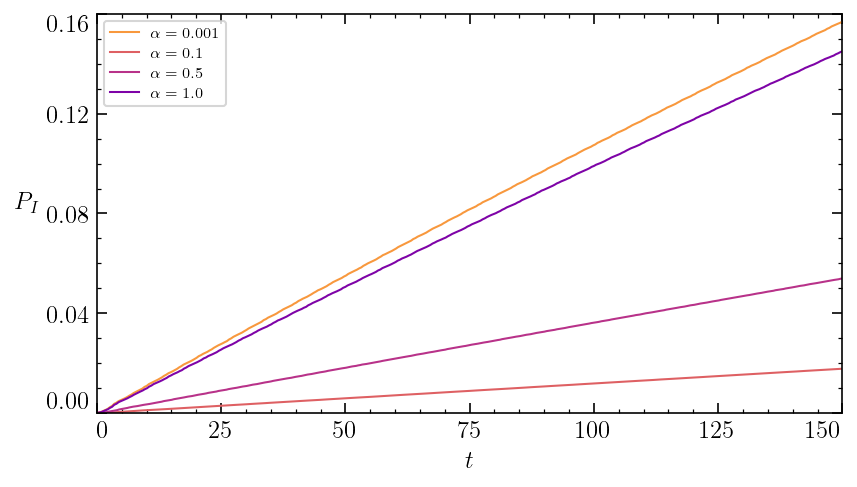

In [14]:
folder_path = results_path + "ionization/vary_alpha/take_1"
all_items = os.listdir(folder_path)

# Filter out only files
files = sorted([os.path.join(folder_path, f) for f in all_items if os.path.isfile(os.path.join(folder_path, f))])

fig3 = plt.figure(dpi=148)
fig3.gca().set_xlim(0, 150)
fig3.gca().set_ylim(0, 0.16)
fig3.gca().set_yticks(np.arange(0, 0.2, 0.04))
fig3.gca().set_xticks(np.arange(0, 175, 25))

fig3.gca().xaxis.set_minor_locator(AutoMinorLocator())
fig3.gca().yaxis.set_minor_locator(AutoMinorLocator())

fig3.gca().tick_params(
    reset=True,
    which='both',
    direction='in',
    right = True,
    top = True
)
fig3.gca().tick_params(
    which='major',
    length=5
)

fig3.gca().set_ylabel(r"$P_I$", rotation=0, labelpad=10)
fig3.gca().set_xlabel(r"$t$")

cols = Perc5[::-1]

i=0
for filename in files:
    with open(filename, "r") as filehandle:
        data = json.load(filehandle)
        filehandle.close()

    alpha = data["parameters"]["alpha"]
    ionization_history = np.array(data["results"]["ionization_probability"])[::3]
    time_grid = np.linspace(0, 150, len(ionization_history))#data["results"]["sliced_time_array"]
    fig3.gca().plot(time_grid, ionization_history, markersize=0, c=cols[i], ls="solid", label=r"$\alpha = {}$".format(alpha))
    i+=1
    print(data["parameters"]["field_amplitude"])

    

#fig1.gca().set_title("The Morse-soft-Coulomb potential")




fig3.gca().legend(loc=0)


fig3.gca().get_yticklabels()[0].set_verticalalignment("bottom")
fig3.gca().get_yticklabels()[-1].set_verticalalignment("top")

fig3.gca().get_xticklabels()[0].set_horizontalalignment("left")
fig3.gca().get_xticklabels()[-1].set_horizontalalignment("right")

In [23]:
fig3.savefig(figures_path + "Fig5" + ".pdf", bbox_inches="tight")

0.001
0.55


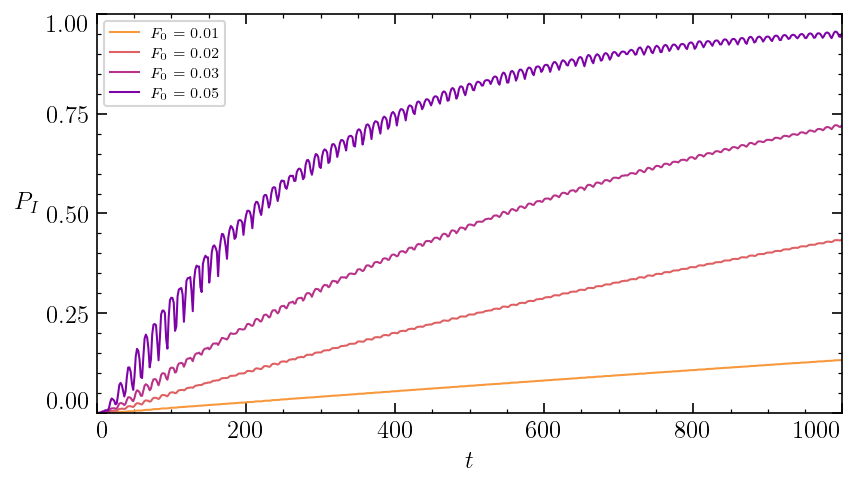

In [11]:
folder_path = results_path + "ionization/vary_amplitude"
all_items = os.listdir(folder_path)

# Filter out only files
files = sorted([os.path.join(folder_path, f) for f in all_items if os.path.isfile(os.path.join(folder_path, f))])

fig4 = plt.figure(dpi=148)
fig4.gca().set_xlim(0, 1000)
fig4.gca().set_ylim(0, 1)
fig4.gca().set_yticks(np.arange(0, 1.25, 0.25))

fig4.gca().xaxis.set_minor_locator(AutoMinorLocator())
fig4.gca().yaxis.set_minor_locator(AutoMinorLocator())

fig4.gca().tick_params(
    reset=True,
    which='both',
    direction='in',
    right = True,
    top = True
)
fig4.gca().tick_params(
    which='major',
    length=5
)

fig4.gca().set_ylabel(r"$P_I$", rotation=0, labelpad=10)
fig4.gca().set_xlabel(r"$t$")

cols = Perc5[::-1]

i=0
for filename in files:
    with open(filename, "r") as filehandle:
        data = json.load(filehandle)
        filehandle.close()

    field_amplitude = data["parameters"]["field_amplitude"]
    time_grid = data["results"]["sliced_time_array"]
    ionization_history = np.array(data["results"]["ionization_probability"])
    fig4.gca().plot(time_grid, ionization_history, markersize=0, c=cols[i], ls="solid", label=r"$F_0 = {}$".format(field_amplitude))
    i+=1

    

#fig1.gca().set_title("The Morse-soft-Coulomb potential")


print(data["parameters"]["alpha"])
print(data["parameters"]["field_freqency"])


fig4.gca().legend(loc=0)


fig4.gca().get_yticklabels()[0].set_verticalalignment("bottom")
fig4.gca().get_yticklabels()[-1].set_verticalalignment("top")

fig4.gca().get_xticklabels()[0].set_horizontalalignment("left")
fig4.gca().get_xticklabels()[-1].set_horizontalalignment("right")

In [13]:
fig4.savefig(figures_path + "Fig4" + ".pdf", bbox_inches="tight")

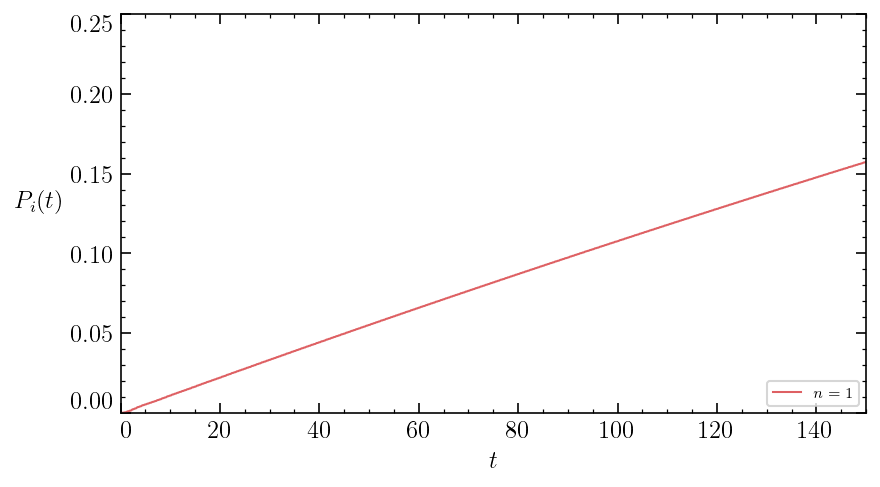

In [10]:
filename = results_path+"ionization/vary_alpha/a--0.001--F0--0.01--Omg--0.6072227633253959-.json"
with open(filename, "r") as filehandle:
    data = json.load(filehandle)
    filehandle.close()

alpha = data["parameters"]["alpha"]
time_grid = data["results"]["sliced_time_array"]
time_grid = np.linspace(0, 150, 1035)
ionization_history = np.array(data["results"]["ionization_probability"])

cols = [Perc5_PURPLE_2, Perc5_ROSSEE_4]

fig3 = plt.figure(dpi=148)
fig3.gca().set_xlim(0, 150)
fig3.gca().set_ylim(0, 0.01)
fig3.gca().set_yticks(np.arange(0, 0.3, 0.05))

fig3.gca().xaxis.set_minor_locator(AutoMinorLocator())
fig3.gca().yaxis.set_minor_locator(AutoMinorLocator())

fig3.gca().tick_params(
    reset=True,
    which='both',
    direction='in',
    right = True,
    top = True
)
fig3.gca().tick_params(
    which='major',
    length=5
)


fig3.gca().set_ylabel(r"$P_i(t)$", rotation=0, labelpad=15)
fig3.gca().set_xlabel(r"$t$")

#fig1.gca().set_title("The Morse-soft-Coulomb potential")



fig3.gca().plot(time_grid, ionization_history, markersize=0, c=cols[1], ls="solid", label=r"$n = 1$")


fig3.gca().legend(loc=4)


fig3.gca().get_yticklabels()[0].set_verticalalignment("bottom")
fig3.gca().get_yticklabels()[-1].set_verticalalignment("top")

fig3.gca().get_xticklabels()[0].set_horizontalalignment("left")
fig3.gca().get_xticklabels()[-1].set_horizontalalignment("right")

0.25
0.1


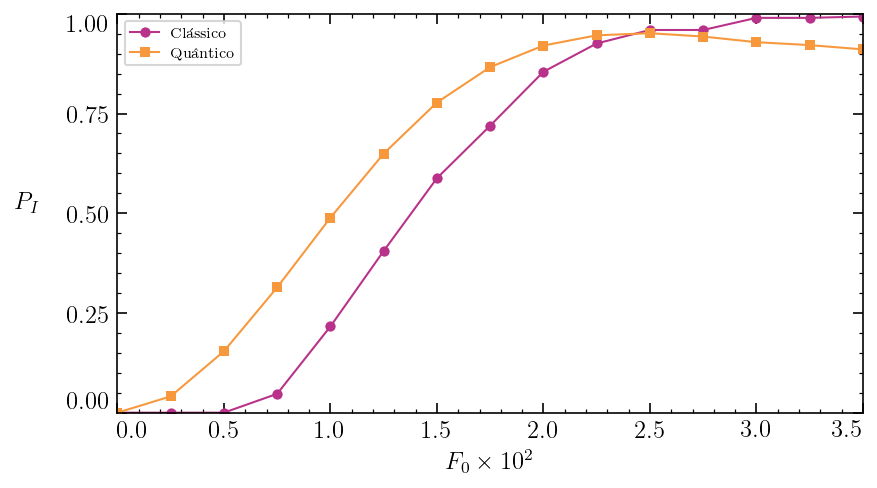

In [16]:
folder_path = results_path + "classical_quantum/vary_amplitude"
all_items = os.listdir(folder_path)

# Filter out only files
files = sorted([os.path.join(folder_path, f) for f in all_items if os.path.isfile(os.path.join(folder_path, f))])

fig5 = plt.figure(dpi=148)
fig5.gca().set_xlim(0, 3.5)
fig5.gca().set_ylim(0, 1)
fig5.gca().set_yticks(np.arange(0, 1.25, 0.25))

fig5.gca().xaxis.set_minor_locator(AutoMinorLocator())
fig5.gca().yaxis.set_minor_locator(AutoMinorLocator())

fig5.gca().tick_params(
    reset=True,
    which='both',
    direction='in',
    right = True,
    top = True
)
fig5.gca().tick_params(
    which='major',
    length=5
)

fig5.gca().set_ylabel(r"$P_I$", rotation=0, labelpad=20)
fig5.gca().set_xlabel(r"$F_0 \times 10^{2}$")

cols = [Perc5_PINKSH_3, Perc5_ORANGE_5]

with open(files[0], "r") as filehandle:
    data = json.load(filehandle)
    filehandle.close()

field_amplitude_set = np.array(data["parameters"]["field_amplitude_set"])
classical_ionization_probabilities = np.array(data["results"]["ionization_probabilities_4rM"])

with open(files[1], "r") as filehandle:
    data = json.load(filehandle)
    filehandle.close()

quantum_ionization_probabilities = np.array(data["results"]["ionization_probabilities_final"])


fig5.gca().plot(field_amplitude_set*100, classical_ionization_probabilities, marker="o", c=cols[0], ls="solid", label=r"Clássico".format(field_amplitude))
fig5.gca().plot(field_amplitude_set*100, quantum_ionization_probabilities, marker="s", c=cols[1], ls="solid", label=r"Quântico".format(field_amplitude))

#fig1.gca().set_title("The Morse-soft-Coulomb potential")

fig5.gca().legend(loc=0)

print(data["parameters"]["field_frequency"])
print(data["parameters"]["alpha"])

fig5.gca().get_yticklabels()[0].set_verticalalignment("bottom")
fig5.gca().get_yticklabels()[-1].set_verticalalignment("top")

fig5.gca().get_xticklabels()[0].set_horizontalalignment("left")
fig5.gca().get_xticklabels()[-1].set_horizontalalignment("right")

In [22]:
fig5.savefig(figures_path + "Fig6" + ".pdf", bbox_inches="tight")

0.005


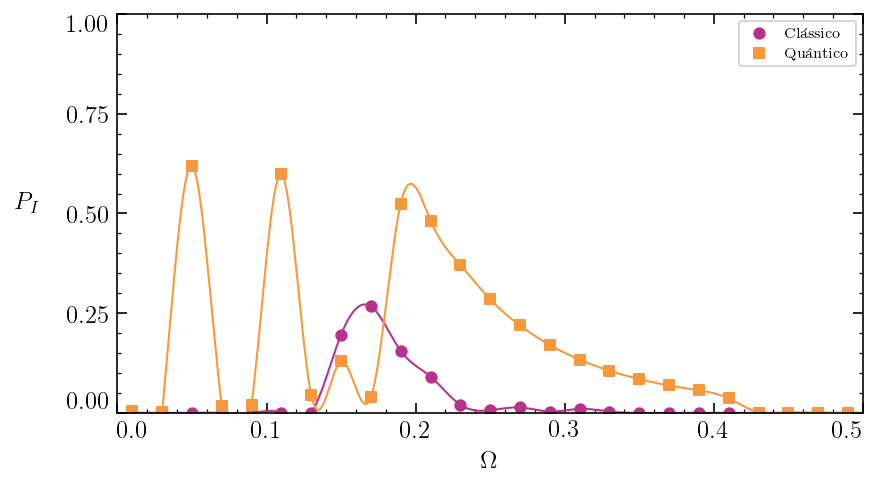

In [18]:
from scipy.interpolate import CubicSpline

folder_path = results_path + "classical_quantum/vary_frequency/take_4"
all_items = os.listdir(folder_path)

# Filter out only files
files = sorted([os.path.join(folder_path, f) for f in all_items if os.path.isfile(os.path.join(folder_path, f))])

fig6 = plt.figure(dpi=148)
fig6.gca().set_xlim(0, 0.5)
fig6.gca().set_ylim(0, 1)
fig6.gca().set_yticks(np.arange(0, 1.25, 0.25))

fig6.gca().xaxis.set_minor_locator(AutoMinorLocator())
fig6.gca().yaxis.set_minor_locator(AutoMinorLocator())

fig6.gca().tick_params(
    reset=True,
    which='both',
    direction='in',
    right = True,
    top = True
)
fig6.gca().tick_params(
    which='major',
    length=5
)

fig6.gca().set_ylabel(r"$P_I$", rotation=0, labelpad=20)
fig6.gca().set_xlabel(r"$\Omega$")

cols = [Perc5_PINKSH_3, Perc5_ORANGE_5]

with open(files[0], "r") as filehandle:
    data = json.load(filehandle)
    filehandle.close()

field_frequency_set = np.array(data["parameters"]["field_frequency_set"])
classical_ionization_probabilities = np.array(data["results"]["ionization_probabilities_4rM"])
classical_spline = CubicSpline(field_frequency_set, classical_ionization_probabilities)
fig6.gca().scatter(field_frequency_set, classical_ionization_probabilities, marker="o", c=cols[0], label=r"Clássico")

with open(files[1], "r") as filehandle:
    data = json.load(filehandle)
    filehandle.close()

field_frequency_set = np.array(data["parameters"]["field_frequency_set"])
quantum_ionization_probabilities = np.array(data["results"]["ionization_probabilities_final"])
quantum_spline = CubicSpline(field_frequency_set, quantum_ionization_probabilities)
fig6.gca().scatter(field_frequency_set, quantum_ionization_probabilities, marker="s", c=cols[1], label=r"Quântico")

frequency_range = np.linspace(0.01, 0.61, 500)


fig6.gca().plot(frequency_range, classical_spline(frequency_range), markersize=0, c=cols[0])
fig6.gca().plot(frequency_range, quantum_spline(frequency_range), markersize=0, c=cols[1])
#fig1.gca().set_title("The Morse-soft-Coulomb potential")

fig6.gca().legend(loc=0)

print(data["parameters"]["field_amplitude"])


fig6.gca().get_yticklabels()[0].set_verticalalignment("bottom")
fig6.gca().get_yticklabels()[-1].set_verticalalignment("top")

fig6.gca().get_xticklabels()[0].set_horizontalalignment("left")
fig6.gca().get_xticklabels()[-1].set_horizontalalignment("right")

In [21]:
fig6.savefig(figures_path + "Fig7" + ".pdf", bbox_inches="tight")

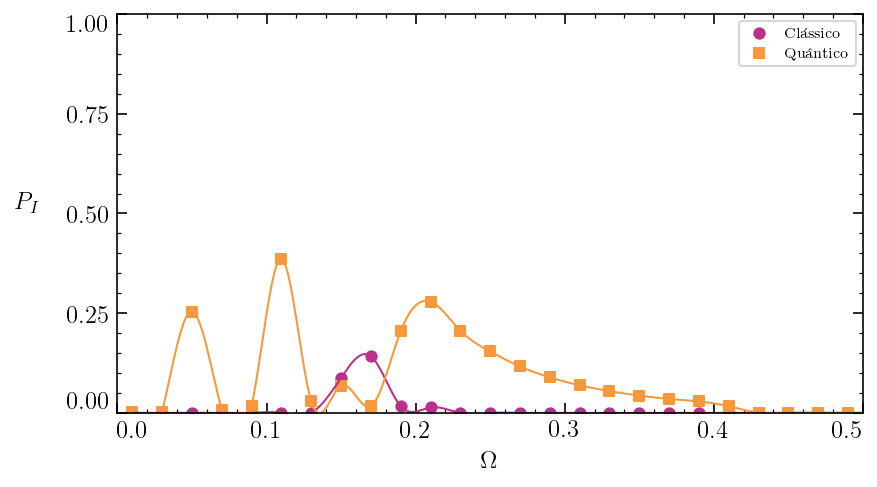

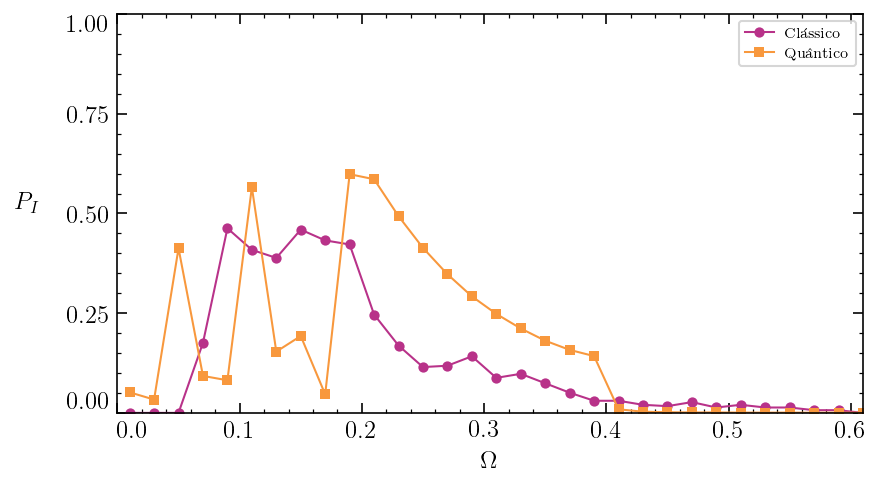

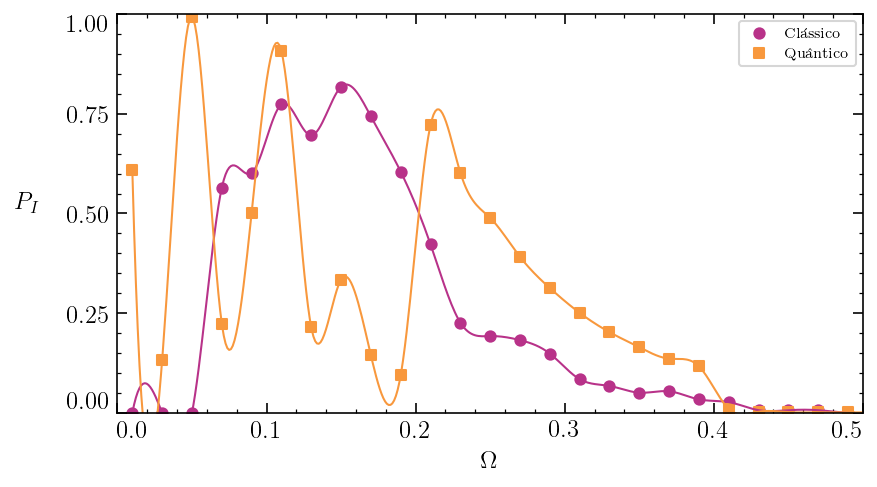